# Imports

In [152]:
import locale
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import os
import pandas as pd
import seaborn as sns
import zlib

In [153]:
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8') 

'pt_BR.UTF-8'

# Data load

In [148]:
qing_cheng_model_name = 'QingCheng'
vallen_model_name = 'Vallen'

In [31]:
def get_file_paths(path: str) -> list:
    file_paths = []

    for dir_path, _, file_names in os.walk(path):
        for file_name in file_names:
            file_path = os.path.join(dir_path, file_name)
            file_paths.append(file_path)

    return file_paths

In [32]:
def mount_file_paths(sensor_name: str) -> dict:
    return {
        'Normalidade': get_file_paths(f'../data/{sensor_name}/normalidade'),
        
        'Vazamento': get_file_paths(f'../data/{sensor_name}/vazamento_5_bar'),
    }

In [33]:
qing_cheng_data_paths = mount_file_paths('qing_cheng')
vallen_data_paths = mount_file_paths('vallen')

In [34]:
qing_cheng_data_paths['Normalidade'] = [qing_cheng_data_paths['Normalidade'][-1]]
qing_cheng_data_paths['Vazamento'] = [qing_cheng_data_paths['Vazamento'][-1]]

vallen_data_paths['Normalidade'] = [vallen_data_paths['Normalidade'][-1]]
vallen_data_paths['Vazamento'] = [vallen_data_paths['Vazamento'][-1]]

In [35]:
def load_npy_file(compressed_file_path: str, position_1, position_2, state):
    # Lê o arquivo comprimido
    with open(compressed_file_path, 'rb') as compressed_file:
        compressed_data = compressed_file.read()

    # Descomprime os dados
    decompressed_data = zlib.decompress(compressed_data)

    # Converte os dados descomprimidos em um array NumPy
    decompressed_array = np.frombuffer(decompressed_data, dtype=np.float64)

    # Supondo que os dados estão organizados em dois canais alternadamente
    channel_1 = decompressed_array[::2]  # Pega todos os elementos nos índices pares
    channel_2 = decompressed_array[1::2]  # Pega todos os elementos nos índices ímpares

    # DataFrame Pandas com os dados dos canais
    data = {
        'posicao_canal_1': position_1,
        'valor_canal_1': channel_1,
        'posicao_canal_2': position_2,
        'valor_canal_2': channel_2,
        'estado': state,
    }

    df = pd.DataFrame(data)

    return df

In [36]:
def mount_data_frames(paths: list[str]):
  data_frame_dict = {}

  for path in paths:
    file_name = path.split('/')[-1]
    data_info = file_name.split('-')[:4]
    # data_info[0] -> Tipo de sensor
    # data_info[1] -> Estado
    # data_info[2] e data_info[3] -> Canal & Posição

    state = data_info[1]
    channel_1 = data_info[2].split('_')[-1]
    channel_2 = data_info[3].split('_')[-1]

    # DF -> | POSICAO_CANAL_1 | POSICAO_VALOR_1 | POSICAO_CANAL_2 | POSICAO_VALOR_2 | ESTADO |
    df = load_npy_file(path, channel_1, channel_2, state)
    data_frame_dict[channel_2] = df

  return data_frame_dict

In [37]:
def mount_data_frame_dict(data_path: dict) -> dict:
    data_frame_dict = {}
    
    for data_type, paths in data_path.items():
        data_frame_dict[data_type] = mount_data_frames(paths)
        
    return data_frame_dict

In [38]:
qing_cheng_data = mount_data_frame_dict(qing_cheng_data_paths)

In [39]:
vallen_data = mount_data_frame_dict(vallen_data_paths)

# Plot

In [180]:
def plot_raw_data(df: pd.DataFrame, title: str, position: str, sensor_name: str, y_tick: tuple[float, float]):
    plt.figure(figsize=(10, 6))
    
    sns.set_palette('muted')
    
    plt.plot(df.index, df['valor_canal_1'], label='Canal 1')
    plt.plot(df.index, df['valor_canal_2'], label='Canal 2')
    
    plt.xlabel('Amostras', fontsize=14)
    plt.ylabel('Magnitude (V)', fontsize=14)
    plt.title(f'{sensor_name} - {title}: Posição {position}', fontsize=16)
    
    plt.xticks(np.linspace(0, len(df.index), 21, dtype=int), fontsize=12)
    plt.yticks(np.linspace(y_tick[0], y_tick[1], 11), fontsize=12)
    
    formatter_x = ScalarFormatter()
    formatter_x.set_powerlimits((6, 6))
    formatter_x.set_useLocale(True)
    plt.gca().xaxis.set_major_formatter(formatter_x)
    plt.gca().xaxis.offsetText.set_fontsize(11)
    
    formatter_y = ScalarFormatter()
    formatter_y.set_useLocale(True)
    plt.gca().yaxis.set_major_formatter(formatter_y)
    
    plt.legend()
    plt.show()

## Qing-Cheng

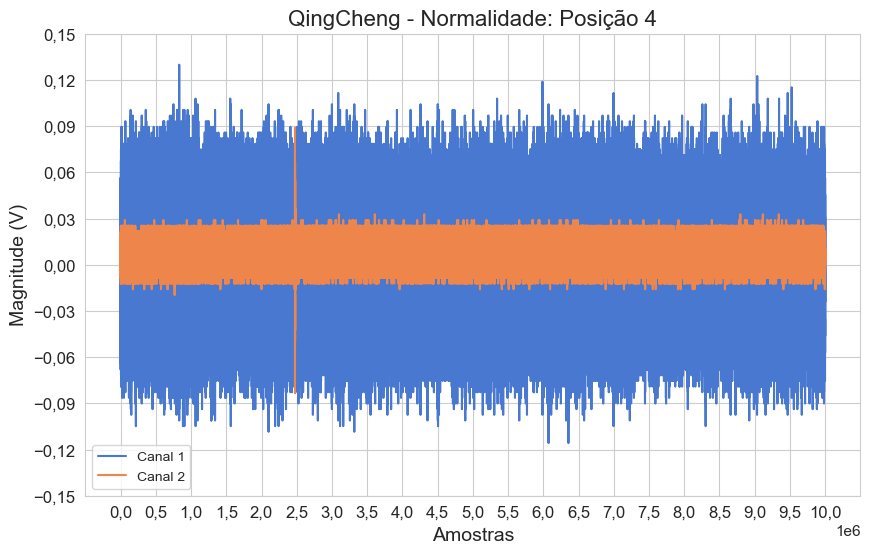

In [181]:
plot_raw_data(qing_cheng_data['Normalidade']['4'], 'Normalidade', '4', qing_cheng_model_name, (-0.15, 0.15))

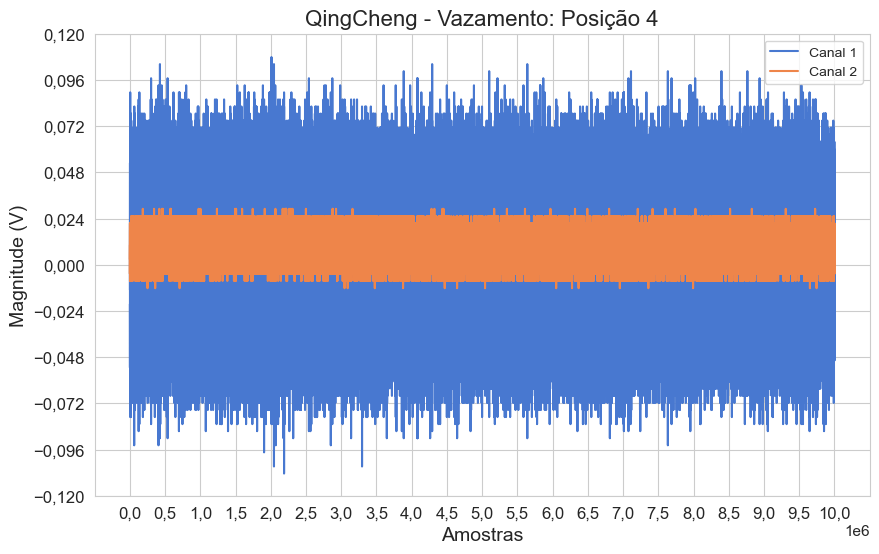

In [192]:
plot_raw_data(qing_cheng_data['Vazamento']['4'], 'Vazamento', '4', qing_cheng_model_name, (-0.12, 0.12))

## Vallen

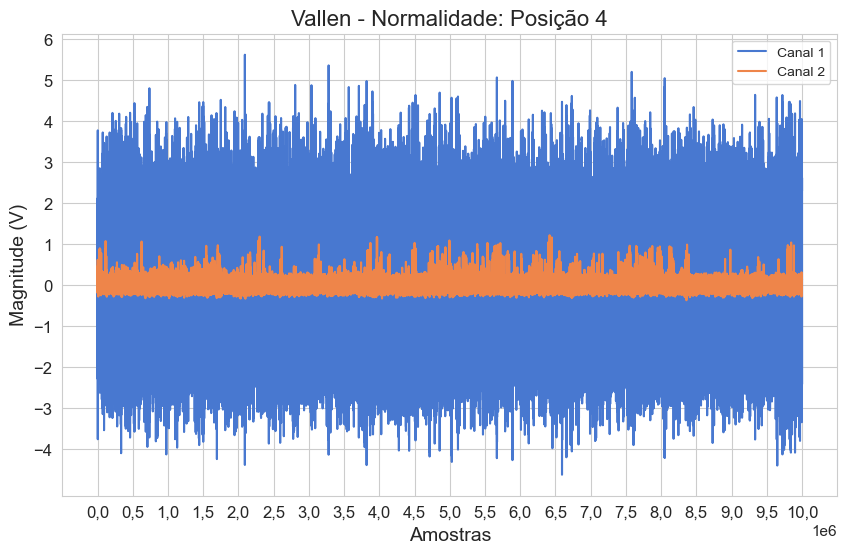

In [193]:
plot_raw_data(vallen_data['Normalidade']['4'], 'Normalidade', '4', vallen_model_name, (-4, 6))

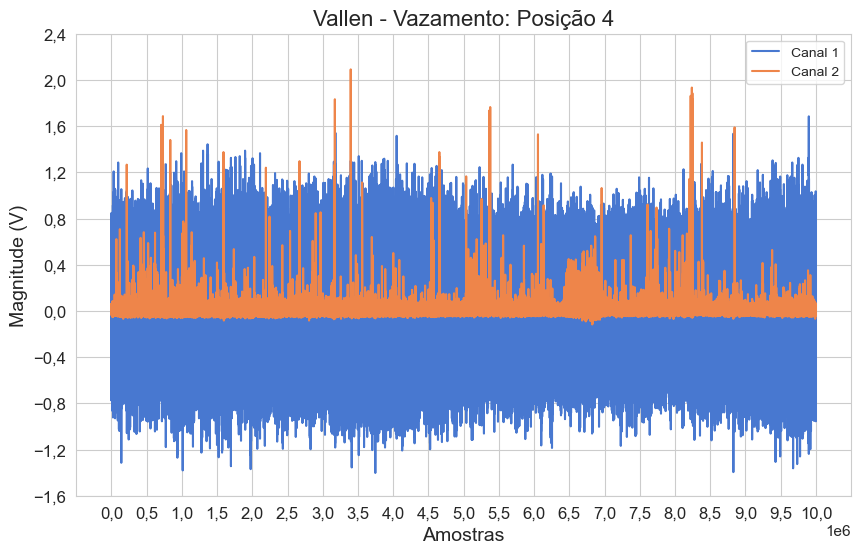

In [199]:
plot_raw_data(vallen_data['Vazamento']['4'], 'Vazamento', '4', vallen_model_name, (-1.6, 2.4))

## Overlapping

In [ ]:
def plot_raw_data(df: pd.DataFrame, title: str, position: str, sensor_name: str, y_tick: tuple[float, float]):
    plt.figure(figsize=(10, 6))
    
    sns.set_palette('muted')
    
    plt.plot(df.index, df['valor_canal_1'], label='Canal 1')
    plt.plot(df.index, df['valor_canal_2'], label='Canal 2')
    
    plt.xlabel('Amostras', fontsize=14)
    plt.ylabel('Magnitude (V)', fontsize=14)
    plt.title(f'{sensor_name} - {title}: Posição {position}', fontsize=16)
    
    plt.xticks(np.linspace(0, len(df.index), 21, dtype=int), fontsize=12)
    plt.yticks(np.linspace(y_tick[0], y_tick[1], 11), fontsize=12)
    
    formatter_x = ScalarFormatter()
    formatter_x.set_powerlimits((6, 6))
    formatter_x.set_useLocale(True)
    plt.gca().xaxis.set_major_formatter(formatter_x)
    plt.gca().xaxis.offsetText.set_fontsize(11)
    
    formatter_y = ScalarFormatter()
    formatter_y.set_useLocale(True)
    plt.gca().yaxis.set_major_formatter(formatter_y)
    
    plt.legend()
    plt.show()

In [207]:
def plot_overlapping_raw_data(df_a: pd.DataFrame, df_b: pd.DataFrame,title: str, position: str, sensor_name_a: str, sensor_name_b: str, y_tick: tuple[float, float]):
    plt.figure(figsize=(10, 6))
    
    sns.set_palette('muted')
    
    plt.plot(df_a.index, df_a['valor_canal_1'], label=f'{sensor_name_a} - Canal 1')
    plt.plot(df_a.index, df_a['valor_canal_2'], label=f'{sensor_name_a} - Canal 2')
    
    plt.plot(df_b.index, df_b['valor_canal_1'], label=f'{sensor_name_b} - Canal 1')
    plt.plot(df_b.index, df_b['valor_canal_2'], label=f'{sensor_name_b} - Canal 2')
    
    plt.xlabel('Amostras', fontsize=14)
    plt.ylabel('Magnitude (V)', fontsize=14)
    plt.title(f'{title}: Posição {position}', fontsize=16)
    
    plt.xticks(np.linspace(0, len(df_a.index), 21, dtype=int), fontsize=12)
    plt.yticks(np.linspace(y_tick[0], y_tick[1], 11), fontsize=12)
    
    formatter_x = ScalarFormatter()
    formatter_x.set_powerlimits((6, 6))
    formatter_x.set_useLocale(True)
    plt.gca().xaxis.set_major_formatter(formatter_x)
    plt.gca().xaxis.offsetText.set_fontsize(11)
    
    formatter_y = ScalarFormatter()
    formatter_y.set_useLocale(True)
    plt.gca().yaxis.set_major_formatter(formatter_y)
    
    plt.legend(loc='upper right')
    plt.show()

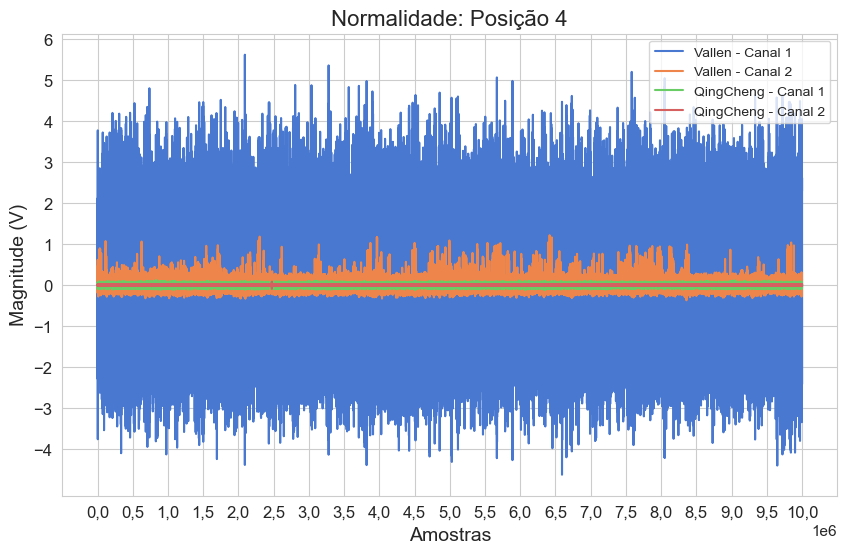

In [208]:
title='Normalidade'
position='4'

plot_overlapping_raw_data(
    df_a=vallen_data[title][position],
    sensor_name_a=vallen_model_name,
    df_b=qing_cheng_data[title][position],
    sensor_name_b=qing_cheng_model_name,
    title=title,
    position=position,
    y_tick=(-4, 6)
)

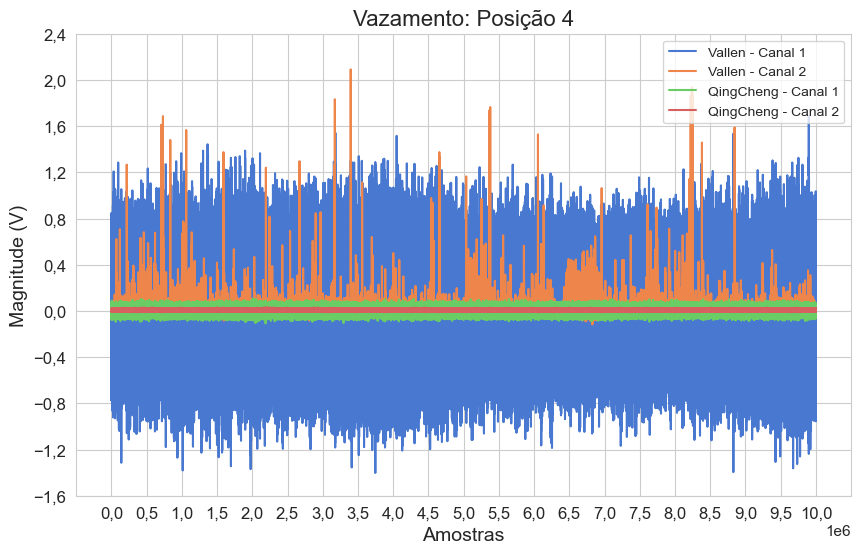

In [209]:
title='Vazamento'
position='4'

plot_overlapping_raw_data(
    df_a=vallen_data[title][position],
    sensor_name_a=vallen_model_name,
    df_b=qing_cheng_data[title][position],
    sensor_name_b=qing_cheng_model_name,
    title=title,
    position=position,
    y_tick=(-1.6, 2.4)
)